# Wine Quality Prediction

Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df_corr = df.corr()
df_corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

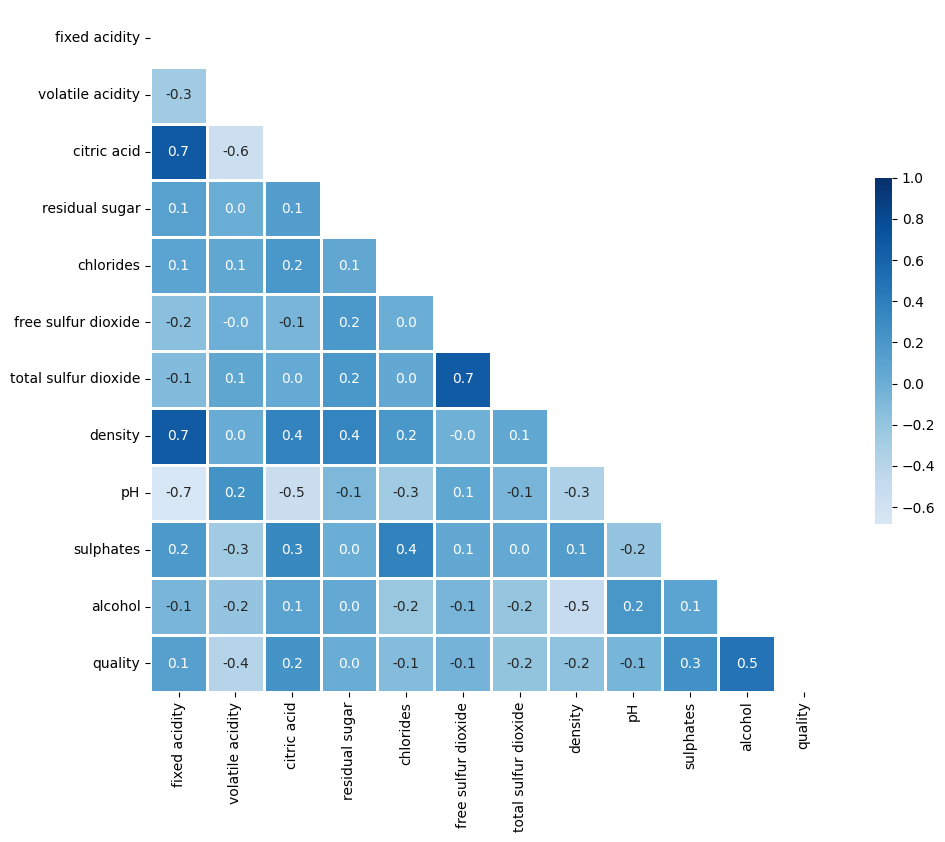

In [7]:
import seaborn as sns
mask = np.triu(np.ones_like(df_corr,dtype=bool))
f,ax = plt.subplots(figsize=(11,9))

cmap = sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(df_corr,mask=mask,cmap='Blues',vmax=1,center=0,fmt='.1f',annot=True,
            square=True,linewidths=2,cbar_kws={'shrink':.5})
plt.show()

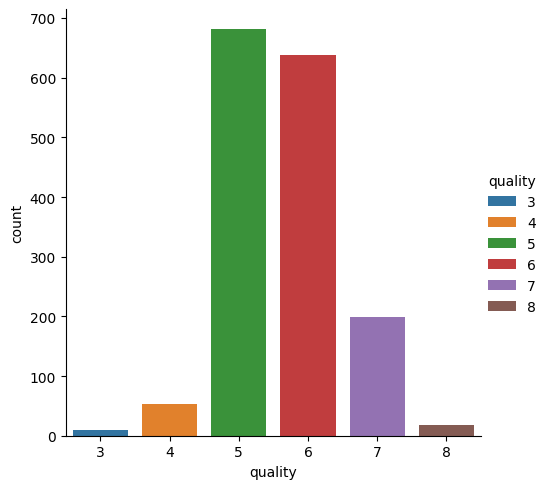

In [9]:
sns.catplot(x='quality',data=df,kind='count',palette='tab10',hue='quality',legend=True)
plt.show()

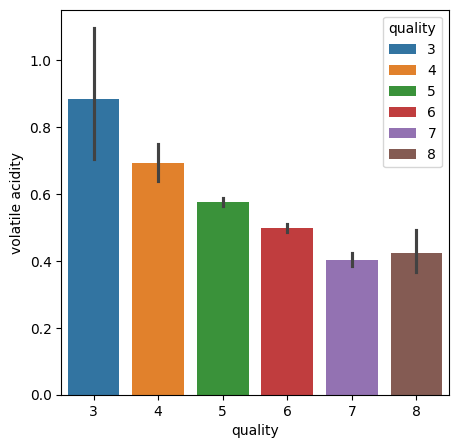

In [10]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data = df,hue='quality',palette='tab10')
plt.show()

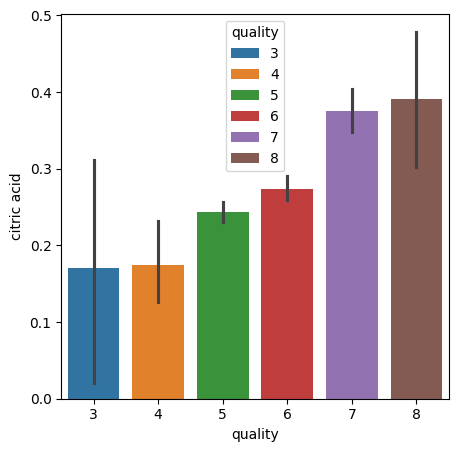

In [11]:
plot= plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=df,hue='quality',palette='tab10')
plt.show()

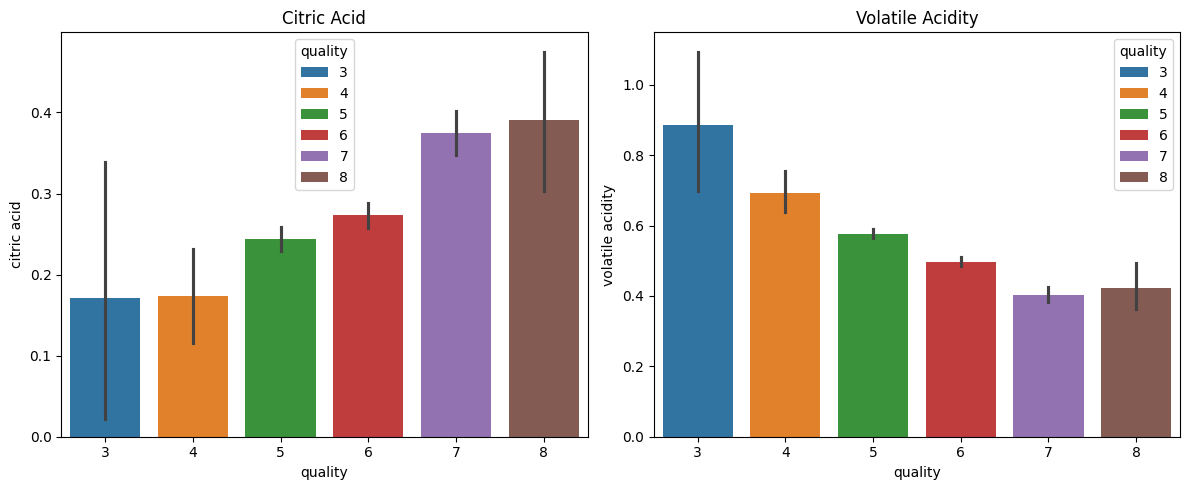

In [12]:
fig,axs= plt.subplots(1,2,figsize=(12,5))

sns.barplot(x='quality',y='citric acid',data=df,hue='quality',palette='tab10',ax=axs[0])
axs[0].set_title('Citric Acid')

sns.barplot(x='quality',y='volatile acidity',data=df,hue='quality',palette='tab10',ax=axs[1])
axs[1].set_title('Volatile Acidity')

plt.tight_layout()
plt.show()

## **Label Binarization**

In [14]:
X=df.drop('quality',axis=1)
y=df['quality'].apply(lambda x: 1 if x>=7 else 0)

In [15]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,train_size=0.8,stratify=y,random_state=42)
len(X_train),len(X_test),len(y_train),len(y_test)

(1279, 320, 1279, 320)

In [16]:
y_train.value_counts()/len(y_train),y_test.value_counts()/len(y_test)

(quality
 0    0.863956
 1    0.136044
 Name: count, dtype: float64,
 quality
 0    0.865625
 1    0.134375
 Name: count, dtype: float64)

## **Model Training**

In [17]:
ran_for = RandomForestClassifier(random_state=42)

In [18]:
ran_for.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_train_pred = ran_for.predict(X_train)
accuracy_train = accuracy_score(y_train_pred,y_train)

y_test_pred = ran_for.predict(X_test)
accuracy_test = accuracy_score(y_test_pred,y_test)

print(f'Training Accuracy: {accuracy_train}')
print(f'Testing Accuracy: {accuracy_test}')

Training Accuracy: 1.0
Testing Accuracy: 0.94375


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       291
           1       0.63      0.93      0.75        29

    accuracy                           0.94       320
   macro avg       0.81      0.94      0.86       320
weighted avg       0.96      0.94      0.95       320



## **Building a prdecitve system**

In [48]:
inputdata = X.iloc[4]
label = y.loc[4]
inputdata.values.reshape(1,-1)

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [49]:
input_data_with_features = pd.DataFrame([inputdata.values], columns=X.columns)
input_data_reshaped = input_data_with_features.values.reshape(1, -1)


In [63]:
input_data_reshaped

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [53]:
prdiction = ran_for.predict(input_data_with_features)

In [59]:
prdiction,label

(array([0], dtype=int64), 0)

In [60]:
type(prdiction)

numpy.ndarray

In [62]:
if prdiction[0]==0:
    print('Bad Quality wine')
else:
    print('Good Quality wine')

Bad Quality wine


In [64]:
input_data = (7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4)
input_data_as_array = np.asarray(input_data)
inputdatafinal = input_data_as_array.reshape(1,-1)
inputdatafinal

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [68]:
import joblib
import os
if not os.path.exists('models'):
    os.makedirs('models')

joblib.dump(ran_for,'models/randomforeswine.pkl')


['models/randomforeswine.pkl']

In [69]:
loaded_model = joblib.load('models/randomforeswine.pkl')

In [70]:
loaded_model.predict(input_data_with_features)

array([0], dtype=int64)